In [1]:
from tree_search import *


节点特征验证:
Node 0: features=[1.0, 0.0, 0.2]
Node 1: features=[0.9, 0.1, 0.3]
Node 2: features=[0.85, 0.15, 0.25]
Node 3: features=[0.2, 0.8, 0.9]
Node 4: features=[0.3, 0.7, 0.85]

边权重验证:
Edge 0-1: weight=0.9
Edge 0-2: weight=0.8
Edge 0-3: weight=0.2
Edge 1-2: weight=0.85
Edge 3-4: weight=0.95

余弦相似度矩阵:
[[1.    0.987 0.982 0.305 0.404]
 [0.987 1.    0.997 0.455 0.547]
 [0.982 0.997 1.    0.47  0.558]
 [0.305 0.455 0.47  1.    0.994]
 [0.404 0.547 0.558 0.994 1.   ]]


# 生成测试代码
强行的两个community，保证了community内属性相似度非常好，

In [1]:
import numpy as np
import json

# 设置随机种子以确保可重复性
np.random.seed(42)

# 生成节点特征
def generate_features(num_nodes, feature_dim=2):
    # 生成两个社区的特征
    community_1 = np.random.normal(loc=[0.9, 0.1], scale=0.05, size=(num_nodes // 2, feature_dim))
    community_2 = np.random.normal(loc=[0.1, 0.9], scale=0.05, size=(num_nodes // 2, feature_dim))
    features = np.vstack([community_1, community_2])
    return features

# 生成边
def generate_edges(features, intra_weight=1.0, inter_weight=0.5):
    num_nodes = len(features)
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            # 计算特征相似度
            similarity = np.dot(features[i], features[j]) / (np.linalg.norm(features[i]) * np.linalg.norm(features[j]))
            if similarity > 0.8:  # 强连接
                edges.append({"source": i, "target": j, "weight": intra_weight})
            elif similarity > 0.3:  # 弱连接
                edges.append({"source": i, "target": j, "weight": inter_weight})
    return edges

# 生成图数据
def generate_graph_data(num_nodes=6):
    features = generate_features(num_nodes)
    edges = generate_edges(features)
    nodes = [{"id": i, "features": features[i].tolist()} for i in range(num_nodes)]
    return {"nodes": nodes, "edges": edges}

# 保存为JSON文件
def save_graph_to_json(graph_data, file_path="graph_data.json"):
    with open(file_path, "w") as f:
        json.dump(graph_data, f, indent=2)

# 生成并保存图数据
graph_data = generate_graph_data(num_nodes=10)
save_graph_to_json(graph_data)
print("图数据已保存到 graph_data.json")

图数据已保存到 graph_data.json


最优划分: {'Community_0': {0, 1, 2, 3, 4}, 'Community_1': {5, 6, 7, 8, 9}}


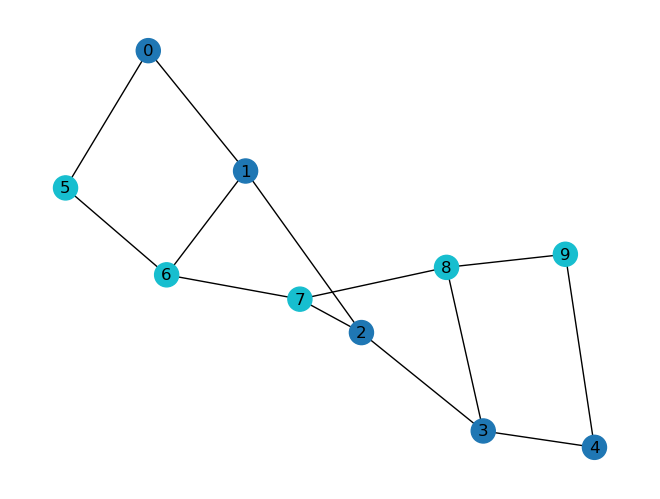

In [1]:
from tree_search import *
import matplotlib.pyplot as plt

def draw_graph(G, communities):
    pos = nx.spring_layout(G)
    colors = [i for i, comm in enumerate(communities.values()) for _ in comm]
    nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.tab10)
    plt.show()

if __name__ == "__main__":
    G = load_graph_from_json('test.json')
    searcher = TreeSearchLouvain(G, r=0.85)  # 调整相似度阈值 r 进行测试
    communities = searcher.run()
    print("最优划分:", communities)
    draw_graph(G, communities)